# Task 1: Prediction using Supervised Machine Learning


# Graduate Rotational Intership Program at The Spark Foundation




# Problem Statement: Predict the percentage of a student based on the number of study hours.



# By Priyanka Kumari

In [46]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Read the Data Frame
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head(5)
               

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.shape

(25, 2)

In [31]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


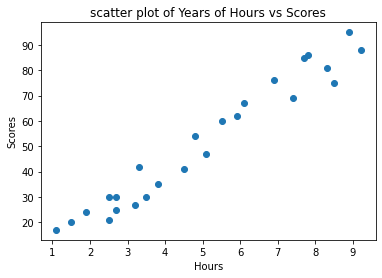

In [34]:
#Data visualization
plt.scatter(x=df.Hours, y=df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('scatter plot of Years of Hours vs Scores')
plt.show()

In [35]:
#Split data frame
X = df.drop('Scores', axis=1)
y = df.drop('Hours', axis=1)
print(X[0:5])
print(y[0:5])
print(X.shape)
print(y.shape)


   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
   Scores
0      21
1      47
2      27
3      75
4      30
(25, 1)
(25, 1)


In [36]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=51)
print('shape of X_train=', X_train.shape)
print('shape of y_train=', y_train.shape)
print('shape of X_test=', X_test.shape)
print('shape of y_test=', X_test.shape)

shape of X_train= (17, 1)
shape of y_train= (17, 1)
shape of X_test= (8, 1)
shape of y_test= (8, 1)


In [37]:
#Select a model and train it
from sklearn.linear_model import LinearRegression
lr=  LinearRegression()


In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([[9.61405732]])

In [40]:
lr.intercept_

array([3.37038239])

In [41]:
y_predict=lr.predict(X_test)
y_predict

array([[56.24769763],
       [77.39862373],
       [69.70737788],
       [83.16705812],
       [29.32833714],
       [52.40207471],
       [74.51440654],
       [34.1353658 ]])

In [42]:
pd.DataFrame(np.c_[X_test, y_test, y_predict], columns=['Hours', 'Scores','Scores_predicted'])

,Hours,Scores,Scores_predicted
0,5.5,60.0,56.247698
1,7.7,85.0,77.398624
2,6.9,76.0,69.707378
3,8.3,81.0,83.167058
4,2.7,30.0,29.328337
5,5.1,47.0,52.402075
6,7.4,69.0,74.514407
7,3.2,27.0,34.135366


In [43]:
#Fine tune model
lr.score(X_test,y_test)

0.9361670674106156

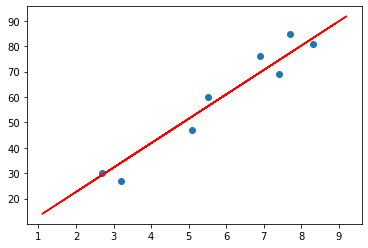

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_train, lr.predict(X_train), color = 'r')